In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')
mouse_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## EDA - Exploratory Data Analysis

In [3]:
df = mouse_study_complete.copy()

In [4]:
len(df)

1893

In [5]:
df.shape

(1893, 8)

In [6]:
df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [7]:
df.isnull().sum() # df=df.dropna()

Mouse ID              0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
dtype: int64

In [8]:
df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [9]:
df['Timepoint'].value_counts()

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [10]:
for column in df.columns:
    print(f"For column: {column}")
    #print("-"*20)
    print(f"There are {df[column].nunique()} unique values.")
    #print(df[column].value_counts())
    print(df[column].dtypes)
    print("-"*20)
    

For column: Mouse ID
There are 249 unique values.
object
--------------------
For column: Timepoint
There are 10 unique values.
int64
--------------------
For column: Tumor Volume (mm3)
There are 1644 unique values.
float64
--------------------
For column: Metastatic Sites
There are 5 unique values.
int64
--------------------
For column: Drug Regimen
There are 10 unique values.
object
--------------------
For column: Sex
There are 2 unique values.
object
--------------------
For column: Age_months
There are 24 unique values.
int64
--------------------
For column: Weight (g)
There are 16 unique values.
int64
--------------------


In [11]:
# Checking the number of mice.
mice_count = len(mouse_study_complete["Mouse ID"].unique())
print(mice_count)

249


In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_complete.loc[mouse_study_complete.duplicated(subset=["Mouse ID", "Timepoint"]),'Mouse ID'].unique()

array(['g989'], dtype=object)

In [13]:
mouse_study_complete[mouse_study_complete["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse bi its ID
clean_mouse_df = mouse_study_complete[mouse_study_complete["Mouse ID"]!="g989"]
clean_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [15]:
# Checking the number of mice in the clean DataFrame
mice_count = len(clean_mouse_df["Mouse ID"].unique())
print(mice_count)

248


Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

tumor_summary_df = pd.DataFrame({
    "Mean Tumor Volume" : mean,
    "Median Tumor Volume" : median,
    "Tumor Volume Variance" : variance,
    "Tumor Volume Std. Dev." : std,
    "Tumor Volume Std. Err." : sem
})

tumor_summary_df




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

tumor_summary_df = pd.DataFrame({
    "mean" : mean,
    "median" : median,
    "var" : variance,
    "std" : std,
    "sem" : sem
})

tumor_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar and Pie Charts

<IPython.core.display.Javascript object>


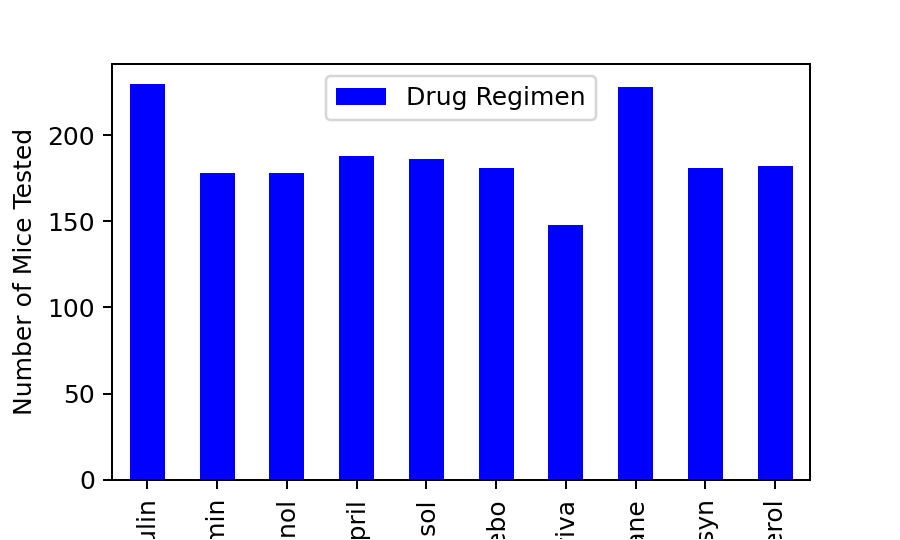

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

total_drugs = clean_mouse_df.groupby("Drug Regimen")
drug_count = pd.DataFrame(total_drugs["Drug Regimen"].count())
drug_bar_plot = drug_count.plot(kind='bar', color="blue", figsize=(5,3))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

<IPython.core.display.Javascript object>


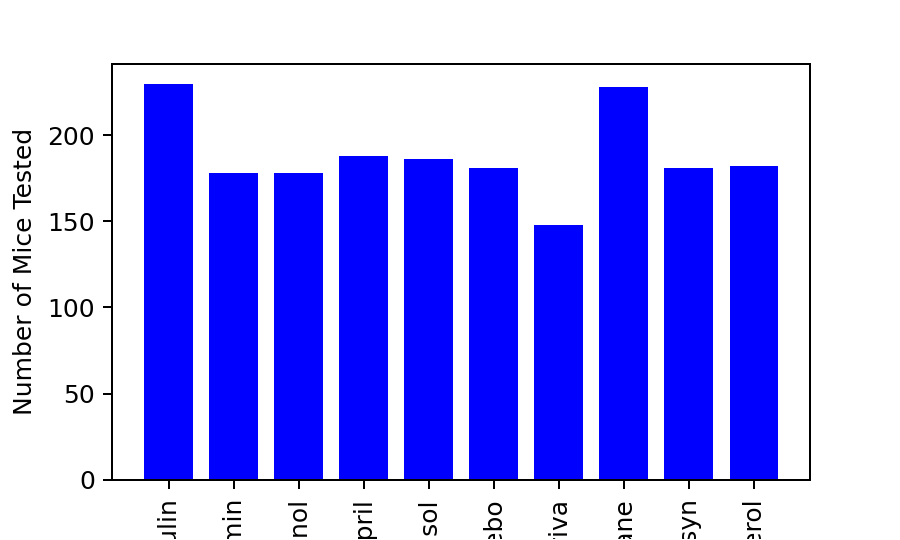

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(drug_count))
tick_loc = [num for num in x_axis]
plt.figure(figsize=(5,3))
plt.bar(x_axis, drug_count["Drug Regimen"], color='b', alpha=1, align="center", width=0.75)
plt.xticks(tick_loc, list(drug_count.index), rotation='vertical')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()

<IPython.core.display.Javascript object>


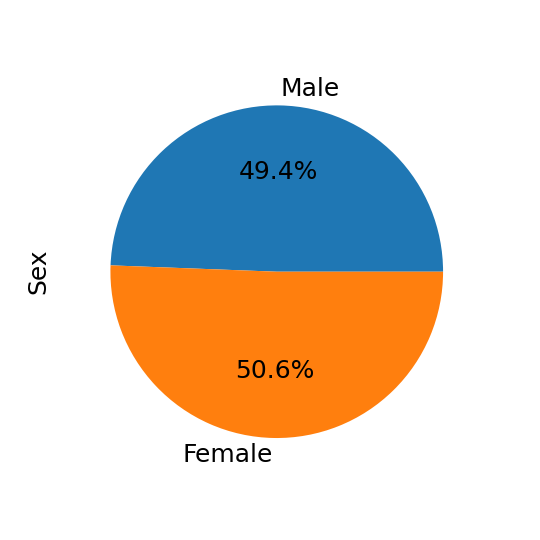

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_df = mouse_study_complete.groupby("Sex")
gender_count = gender_df["Sex"].count()
gender_plot = gender_count.plot(labels=["Male", "Female"], kind = "pie", y = "Sex", autopct = "%1.1f%%", figsize=(3, 3))


<IPython.core.display.Javascript object>


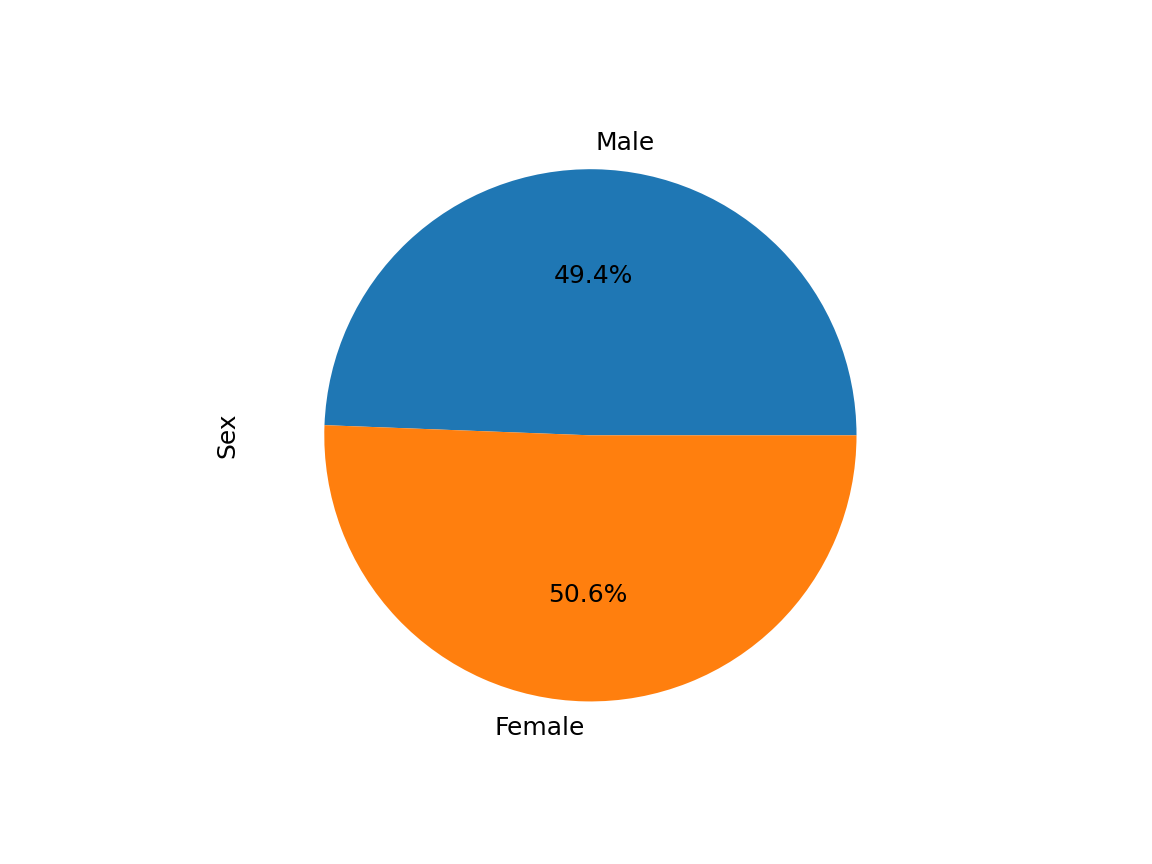

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

count = [gender_count["Female"], gender_count["Male"]]
labels = ["Male", "Female"]
plt.pie(count, labels=["Male", "Female"], autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.show()

Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

lg_timepoint = clean_mouse_df.groupby("Mouse ID")
lg_timepoint = lg_timepoint["Timepoint"].max()
lg_timepoint_df = pd.DataFrame(lg_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

tumor_volume_df = pd.merge(mouse_study_complete, lg_timepoint, on = ["Mouse ID", "Timepoint"])


In [23]:
# Put treatments into a list for for loop (and later for plot labels)

treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_capomulin = []
tumor_vol_ramicane = []
tumor_vol_infubinol = []
tumor-vol_ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

git 

SyntaxError: can't assign to operator (3391195764.py, line 10)